## Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../data/processed/financial_loan_cleaned.csv')
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [2]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [4]:
df["loan_status"].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

The Aim of this project is to build an automated system, that will help the bank to predict whether a customer will pay it debt in full or not will be charged Off. This EDA will work towards this objective.

In [5]:
# Analyzing the 'loan_status' distribution
print(df['loan_status'].value_counts(normalize=True))  # To see the proportion of each category

loan_status
Fully Paid     0.833290
Charged Off    0.138247
Current        0.028463
Name: proportion, dtype: float64


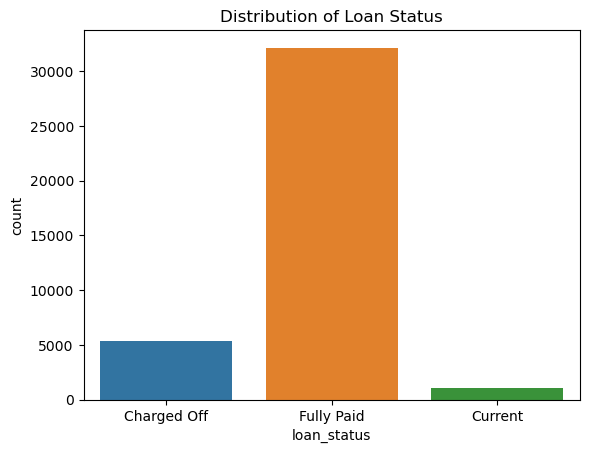

In [6]:
# Visualization of 'loan_status' counts
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan Status')
plt.show()

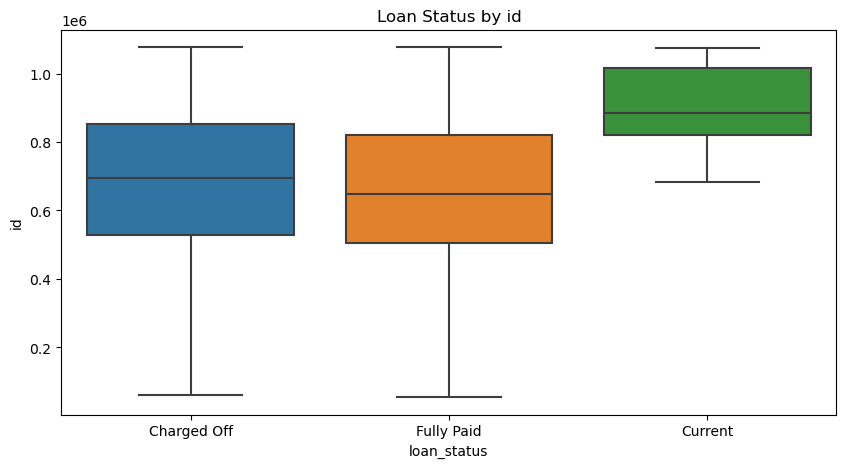

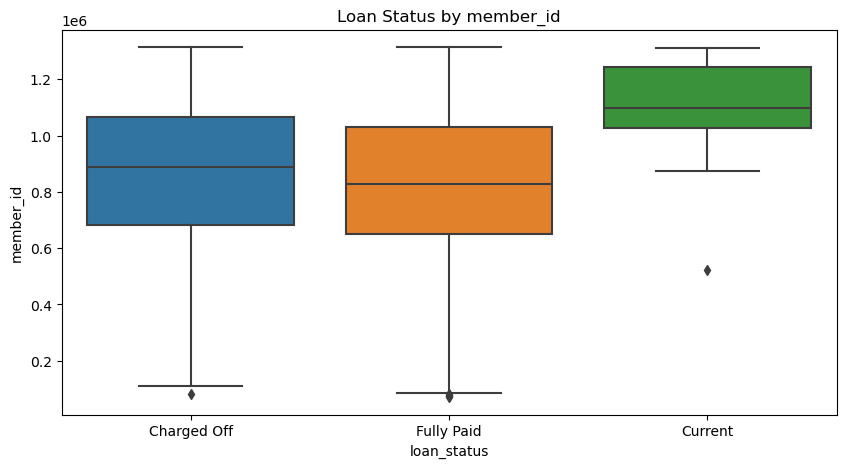

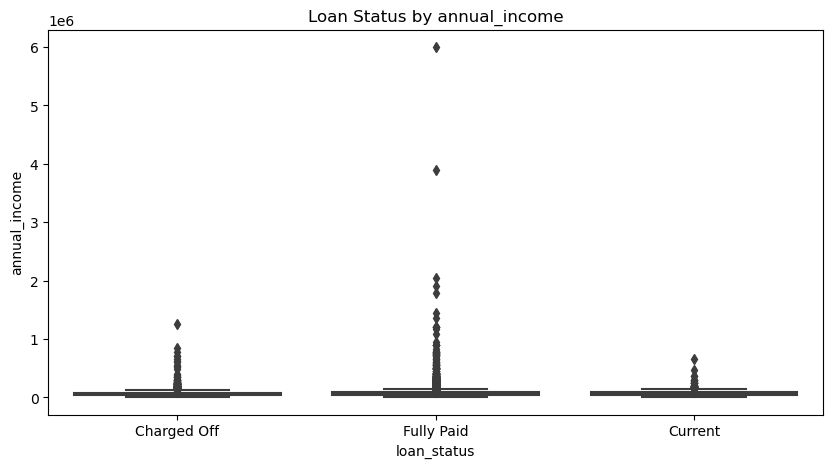

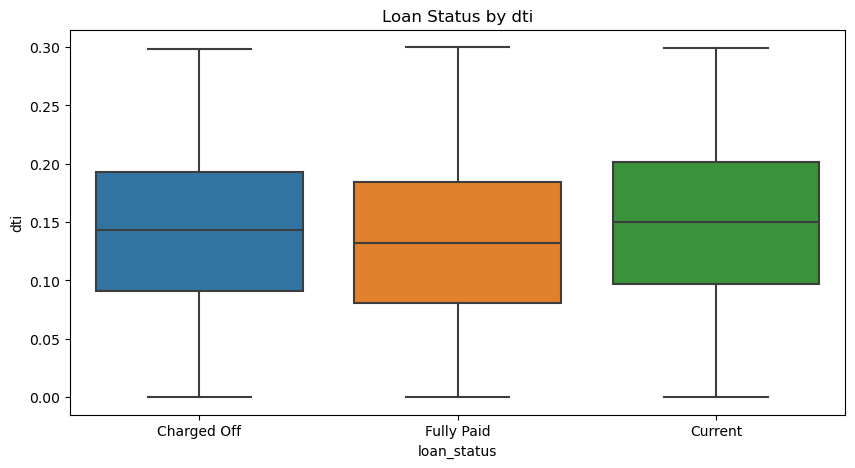

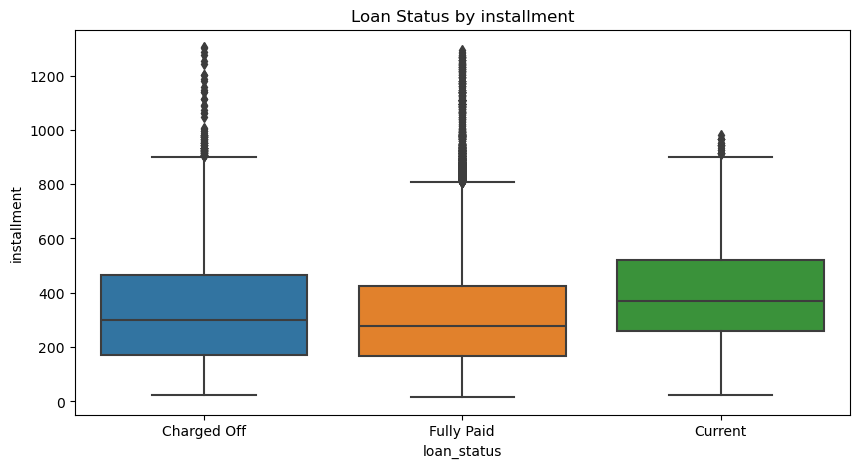

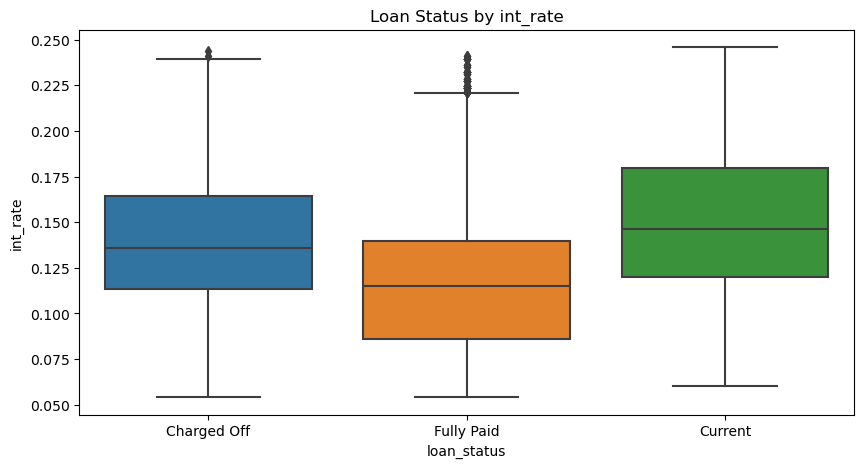

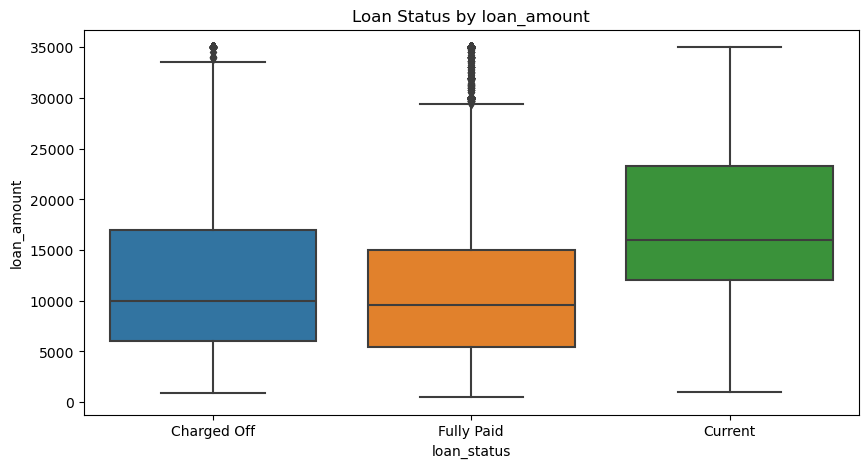

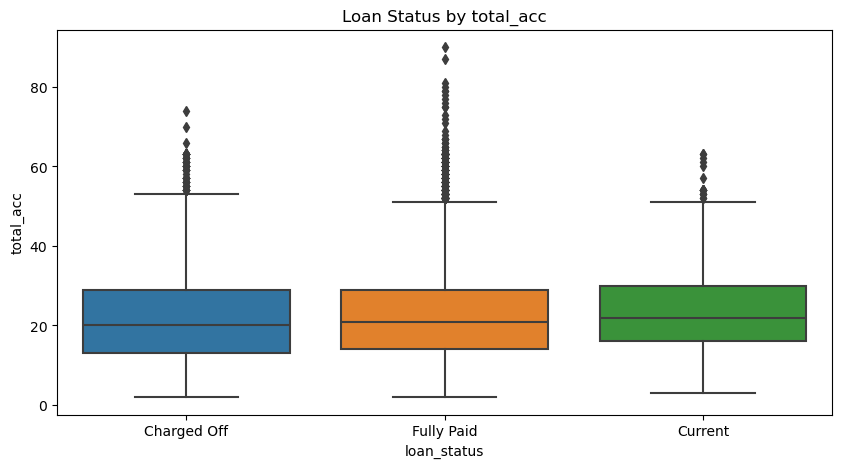

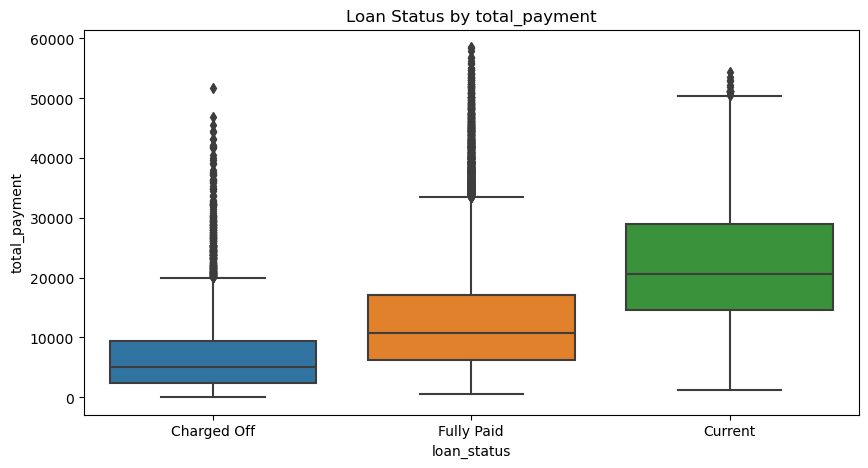

In [11]:
# Exploring relationships between 'loan_status' and numerical features
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='loan_status', y=feature, data=df)
    plt.title(f'Loan Status by {feature}')
    plt.show()

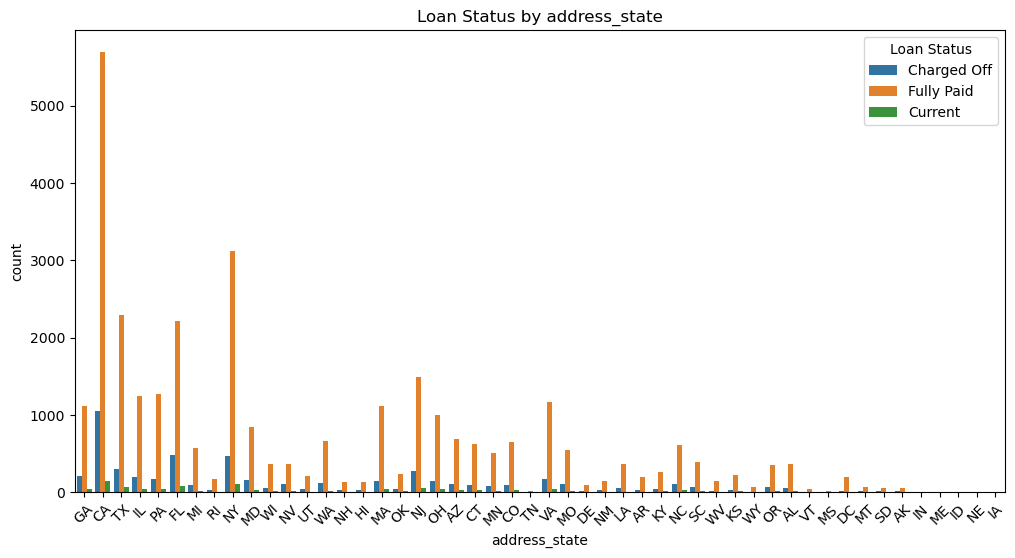

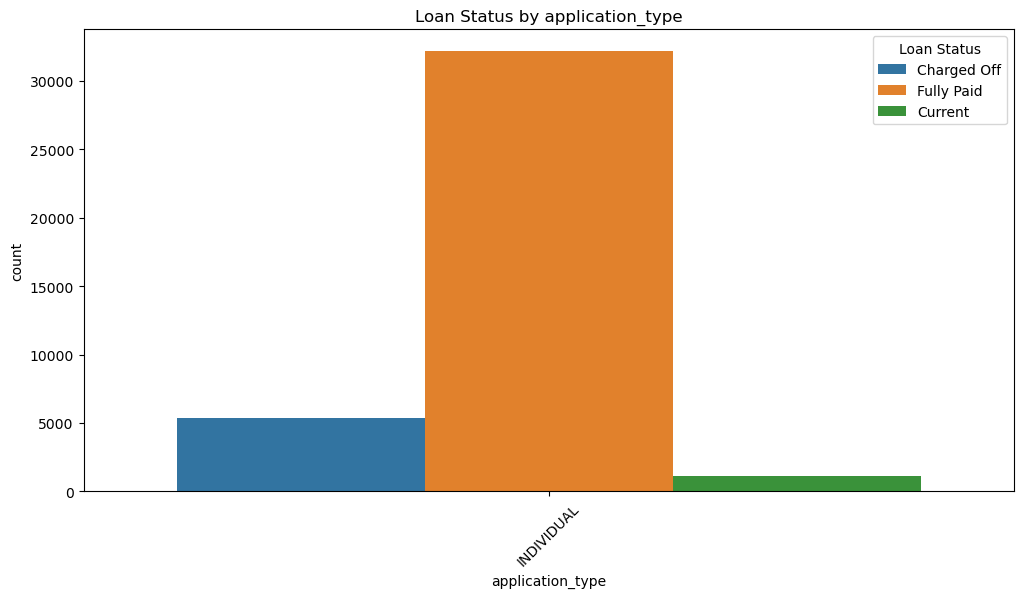

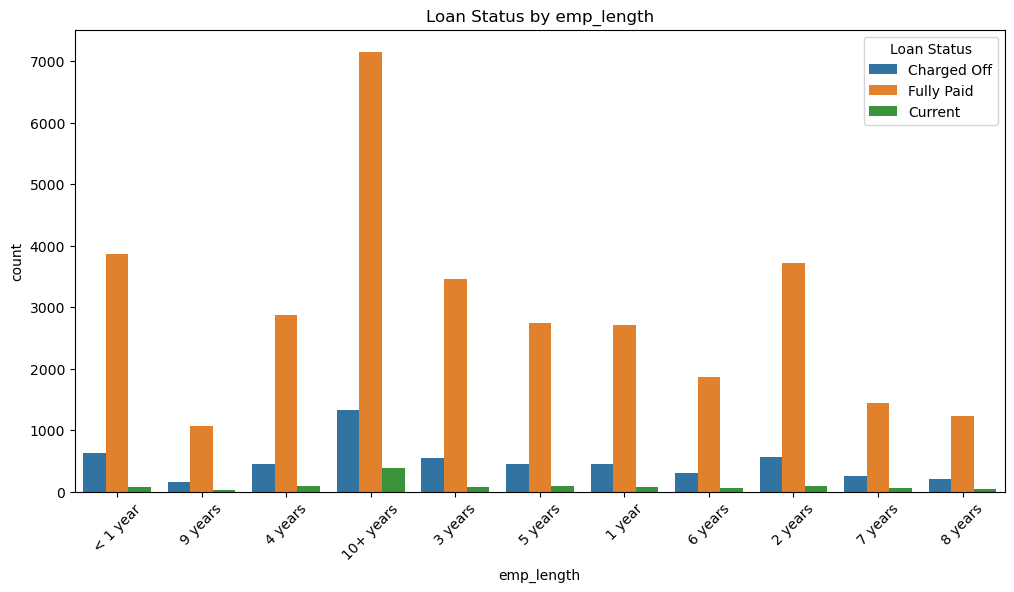

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


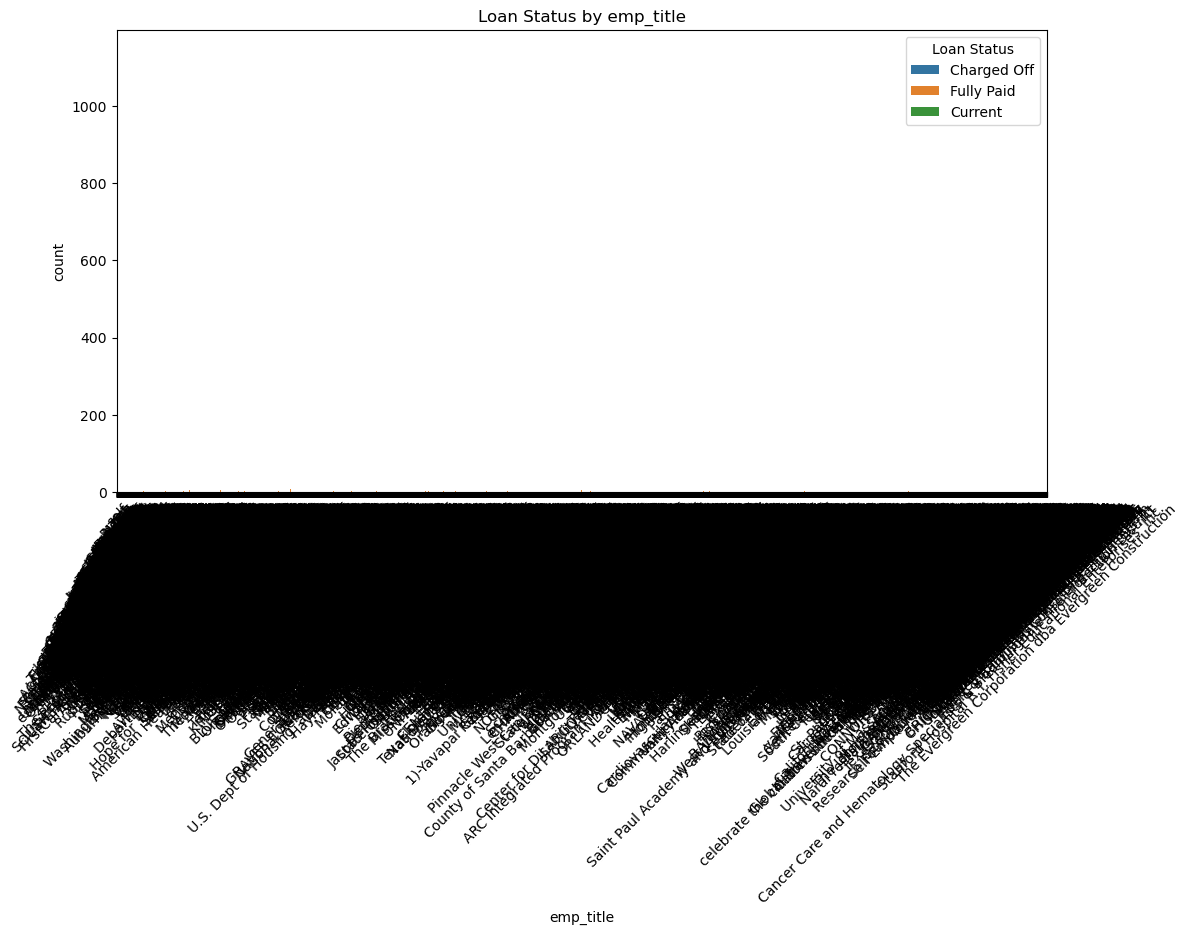

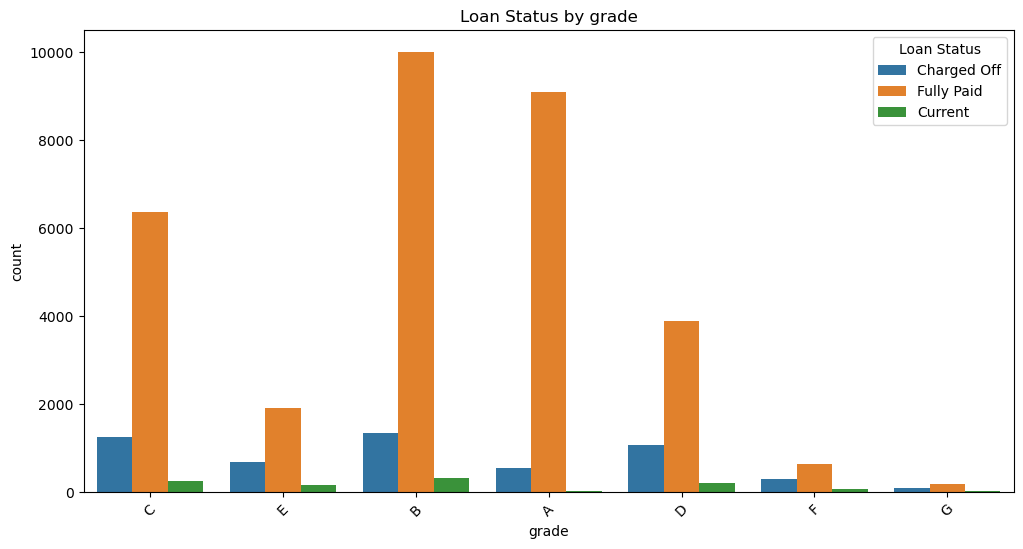

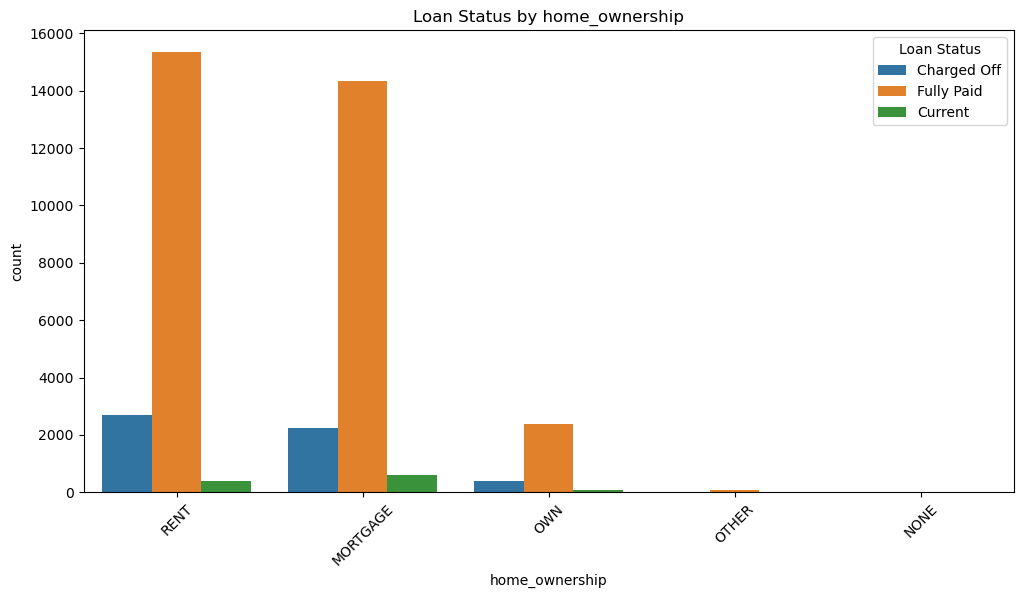

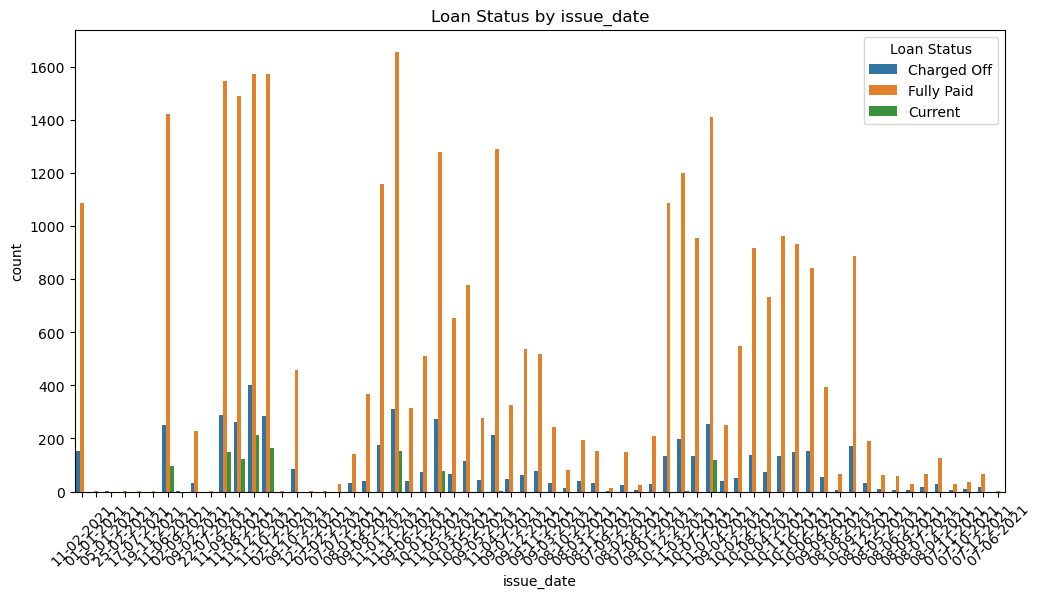

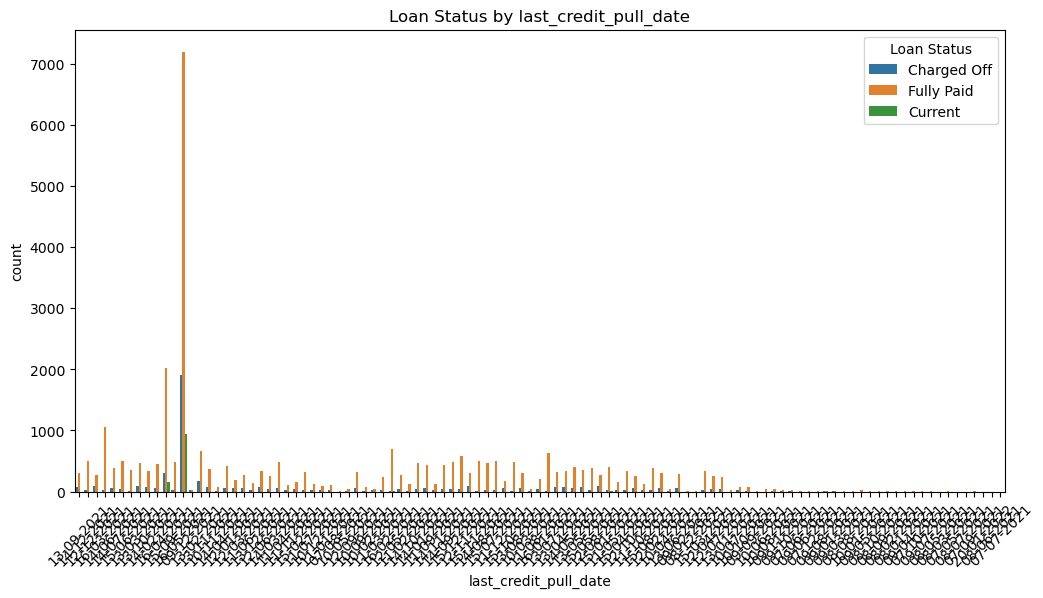

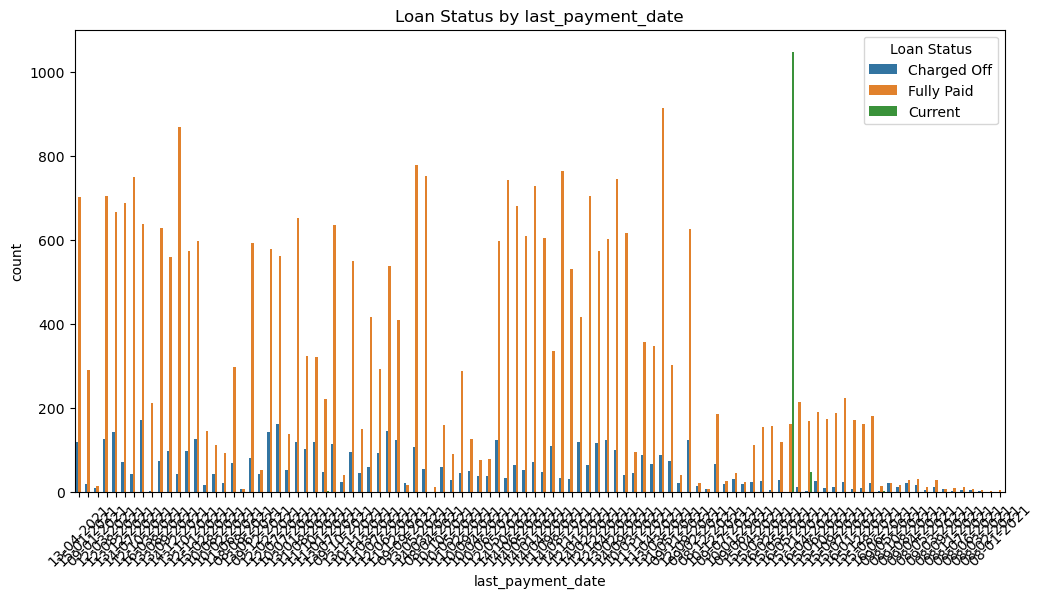

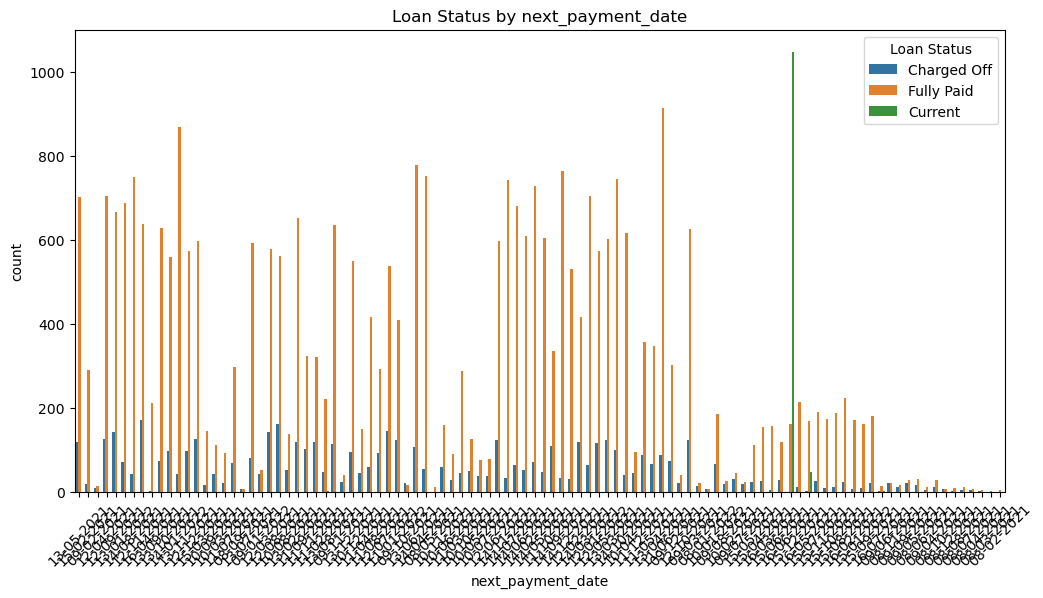

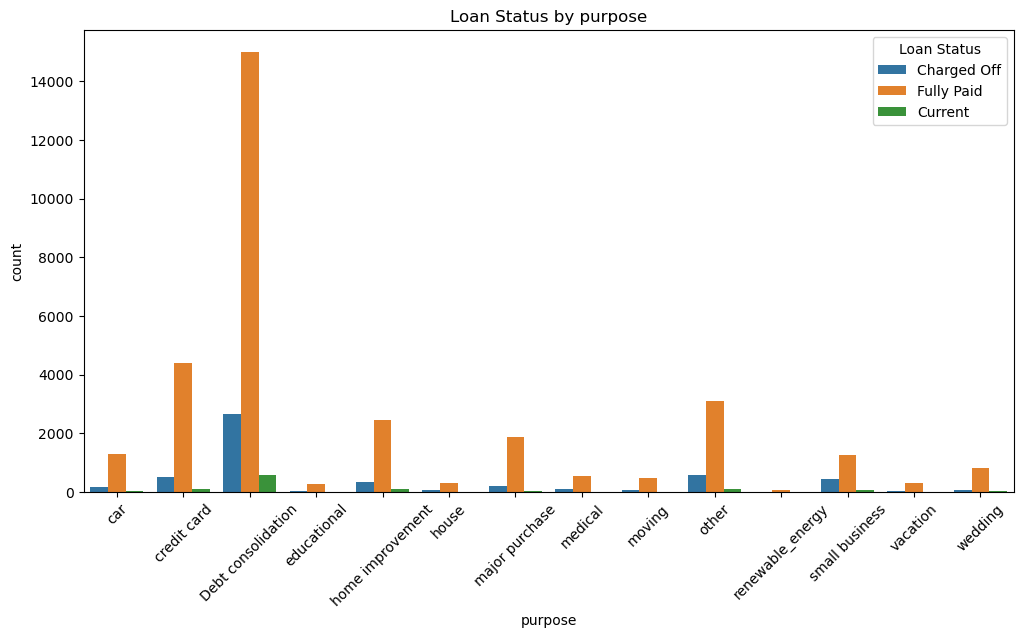

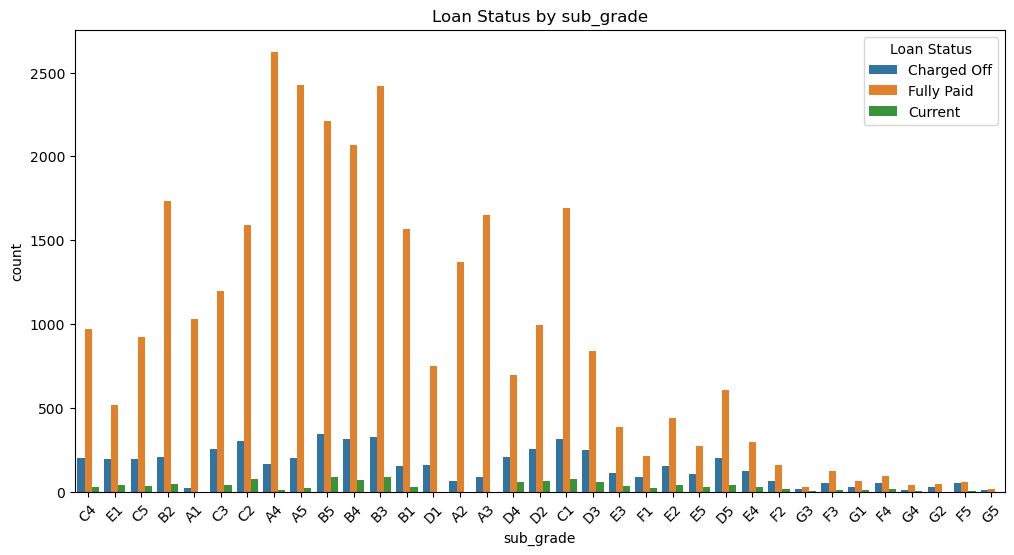

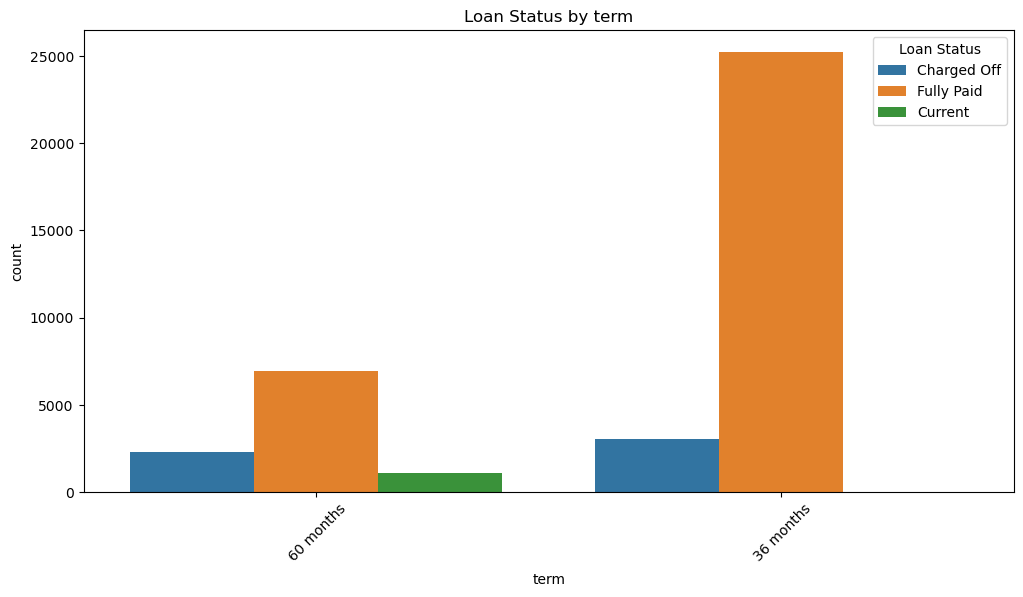

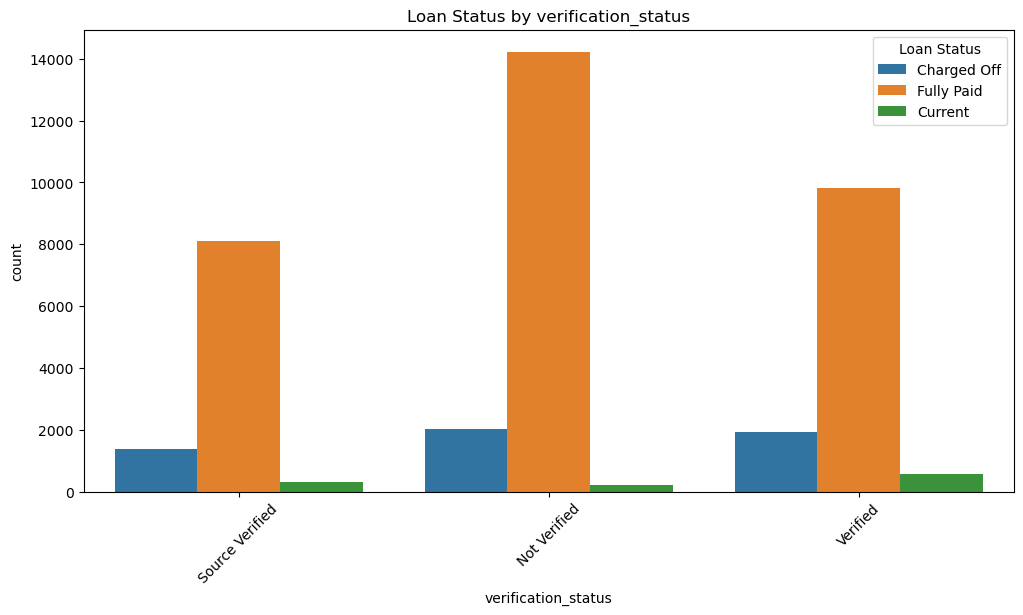

In [13]:
# Exploring relationships between 'loan_status' and categorical features
categorical_features = [col for col in df.columns if df[col].dtype == 'object' and col != 'loan_status']

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, hue='loan_status', data=df)
    plt.title(f'Loan Status by {feature}')
    plt.xticks(rotation=45)
    plt.legend(title='Loan Status')
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


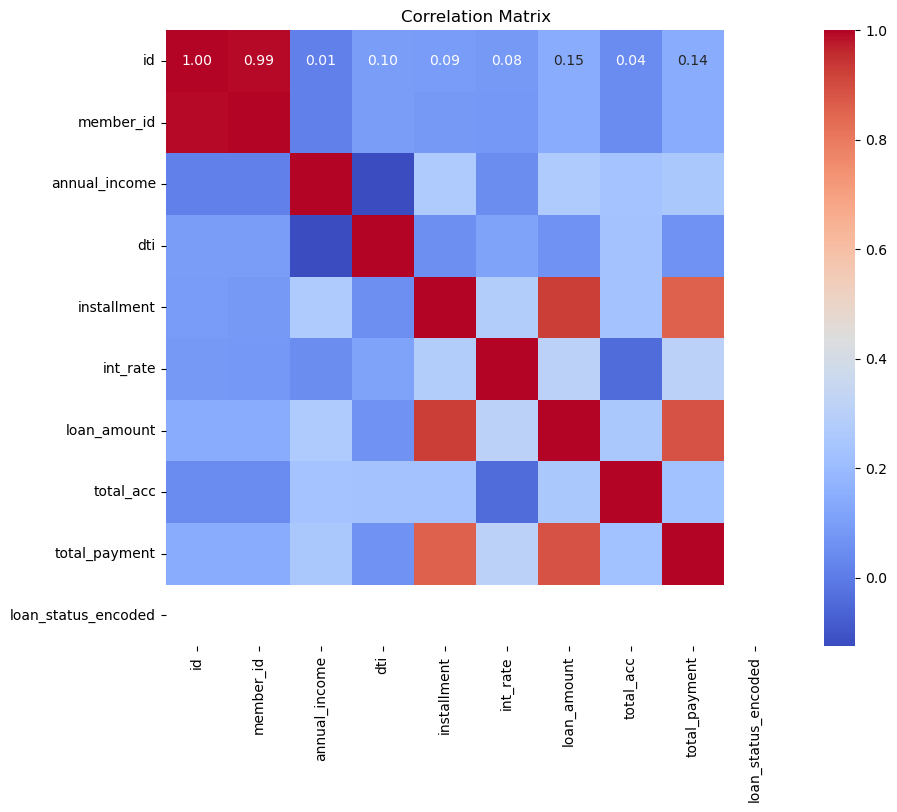

In [12]:
# Correlation matrix of numerical features including 'loan_status' if it's numerical or after encoding
if df['loan_status'].dtype == 'object':
    df['loan_status_encoded'] = df['loan_status'].apply(lambda x: 1 if x == 'Approved' else 0)  # Example encoding
    numerical_features.append('loan_status_encoded')

corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Further analysis can include more sophisticated statistical tests and modeling to predict 'loan_status'.